The objective of this notebook is to predict the popularity of a song using a 600k song dataset from Kaggle. We will use a mix of categorical and numerical features to perform a multi-linear regression using Scikit-Learn Pipelines. The objective is to minimize the "mean_absolute_error" metric.

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pf
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import set_configfrom sklearn.metrics import mean_absolute_error

In [66]:
df = pd.read_csv('Dataset/tracks.csv')

In [67]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [68]:
df = df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature']]

In [4]:
df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [5]:
df = df.sample(frac=0.3).reset_index(drop=True)

In [6]:
df.isna().sum()

id                   0
name                16
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [7]:
df.drop(df[df['popularity']==0].index, inplace=True)

In [8]:
X = df.loc[:, ['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

In [9]:
X[['explicit', 'key', 'mode', 'time_signature']] = X[['explicit', 'key', 'mode', 'time_signature']].astype('category')

In [10]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,162366.000000,162366.000000,162366.000000,162366.000000,162366.000000,162366.000000,162366.000000,162366.000000,162366.000000
mean,0.567241,0.557572,-9.949163,0.101139,0.423388,0.094149,0.213637,0.555719,119.101707
std,0.164406,0.246577,4.908957,0.173378,0.336876,0.244200,0.184933,0.256832,29.507385
min,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.459000,0.371000,-12.544000,0.033500,0.087100,0.000000,0.097600,0.350000,96.171250
50%,0.580000,0.568000,-9.030500,0.043600,0.384000,0.000016,0.138000,0.566000,118.062500
75%,0.688000,0.758000,-6.372000,0.074200,0.738000,0.004490,0.278000,0.772000,137.001000
max,0.991000,1.000000,4.584000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


In [11]:
y = df[['popularity']]

<AxesSubplot:ylabel='Frequency'>

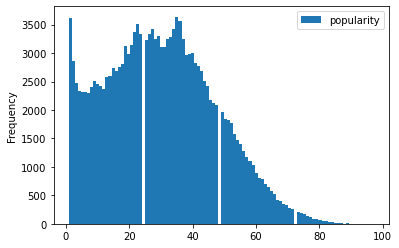

In [12]:
y.plot.hist(bins=100)

In [13]:
y.describe()

,popularity
count,162366.000000
mean,29.817776
std,17.239640
min,1.000000
25%,16.000000
50%,29.000000
75%,42.000000
max,97.000000


In [14]:
numerical_columns_selector = selector(dtype_exclude='category')
categorical_columns_selector = selector(dtype_include='category')

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [15]:
numerical_columns

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [16]:
categorical_columns

['explicit', 'key', 'mode', 'time_signature']

In [17]:
X.dtypes

explicit            category
danceability         float64
energy               float64
key                 category
loudness             float64
mode                category
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
time_signature      category
dtype: object

In [18]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [19]:
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)])

In [20]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=600))
set_config(display='diagram')
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['explicit', 'key', 'mode',
                                                   'time_signature']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['danceability', 'energy',
                                                   'loudness', 'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo'])])),
                ('logisticregression', LogisticRegression(max_iter=600))])

In [21]:
data_train, data_test, target_train, target_test = train_test_split(X, y, random_state=42)

In [22]:
_ = model.fit(data_train, target_train.values.ravel())

In [23]:
pred_test = model.predict(data_test)

In [24]:
mean_absolute_error(target_test, pred_test)

14.51896925502562